<a href="https://colab.research.google.com/github/chadeswetha/slash-mark/blob/basic/basic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
import numpy as np

In [2]:
#load data set from keras
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
#display the shape of the dtata set
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(x_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [5]:
#reshape the data into 4 dimensions
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#conver targests into multi class categories
from tensorflow.keras import utils
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
#display sample img from train data
arr=y_train[100]
print(arr)
la=np.argmax(arr)
print(la)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


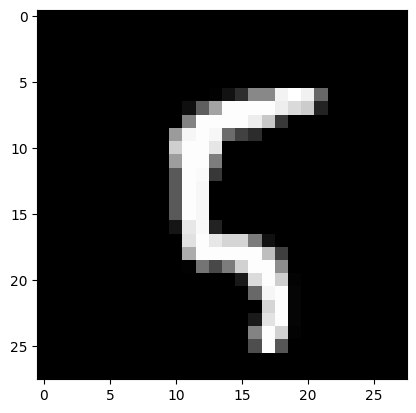

In [8]:
#display the img
import matplotlib.pyplot as plt
plt.imshow(x_train[100],cmap='gray')

In [9]:
#Build CNN model
model=Sequential()

In [10]:

inp=Dense(32,input_shape=(28,28,1))
model.add(inp)

In [11]:
cov1=Conv2D(32,kernel_size=(3,3),activation='relu')
model.add(cov1)

In [12]:
cov2=Conv2D(64,kernel_size=(3,3),activation='relu')
model.add(cov2)

In [13]:
pool1=MaxPool2D(pool_size=(2,2))
model.add(pool1)

In [14]:
drop1=Dropout(0.4) #to avoid overfittinng we are dropping some data
model.add(drop1)

In [15]:
flat1=Flatten()
model.add(flat1)

In [16]:
out=Dense(10,activation='softmax')
model.add(out)

In [17]:
#complie the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [18]:
history=model.fit(x_train,y_train,batch_size=30,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
2000/2000 [==============================] - 15s 5ms/step - loss: 0.2737 - accuracy: 0.9404 - val_loss: 0.0802 - val_accuracy: 0.9765
Epoch 2/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0987 - accuracy: 0.9707 - val_loss: 0.0533 - val_accuracy: 0.9832
Epoch 3/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0798 - accuracy: 0.9764 - val_loss: 0.0533 - val_accuracy: 0.9831
Epoch 4/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.0498 - val_accuracy: 0.9846
Epoch 5/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0454 - val_accuracy: 0.9871
Epoch 6/10
2000/2000 [==============================] - 9s 5ms/step - loss: 0.0405 - accuracy: 0.9870 - val_loss: 0.0425 - val_accuracy: 0.9871
Epoch 7/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.0458 - val_accur

In [19]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0471 - accuracy: 0.9876
0.04712951183319092
0.9876000285148621


In [20]:
arr=model.predict([x_train[100].reshape(1,28,28,1)])

1/1 [==============================] - 1s 689ms/step


In [21]:
arr=y_train[100]
print(arr)
la=np.argmax(arr)
print(la)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5
